In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
data_train=pd.read_csv("train.csv")

In [4]:
data_test=pd.read_csv("test.csv")

In [5]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#data_test.head()

In [7]:
corr=data_train.corr()

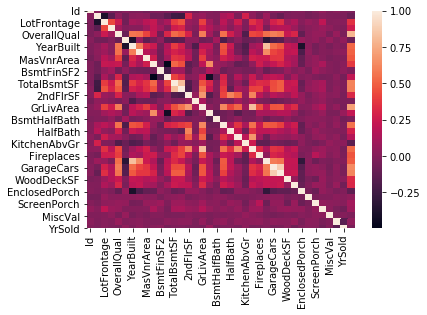

In [8]:
sns.heatmap(corr)

In [9]:
data_train.drop("Id",axis=1,inplace=True)

In [10]:
data_test.drop("Id",axis=1,inplace=True)

In [11]:
data_train.shape ,data_test.shape

((1460, 80), (1459, 79))

In [12]:
#train_data=data_train.values
#test_data=data_test.values

In [13]:
#train_data.shape,test_data.shape

In [14]:
categorical=data_train.select_dtypes(["object"]).columns

In [15]:
numerical=data_train.select_dtypes(["float64","int64"]).columns

In [16]:
corr=data_train.corr()

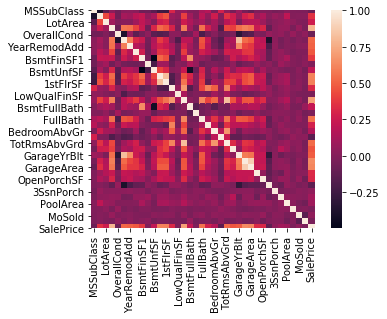

In [17]:
sns.heatmap(corr,square=True)
#sns.heatmap(corr,square=True,cmap=plt.cm.Blues)

In [18]:
indx=corr.nlargest(10,"SalePrice").index             
#indx=corr.nlargest(10,"SalePrice")["SalePrice"].index             ### sir 

In [19]:
corr1=data_train[numerical][indx].corr()

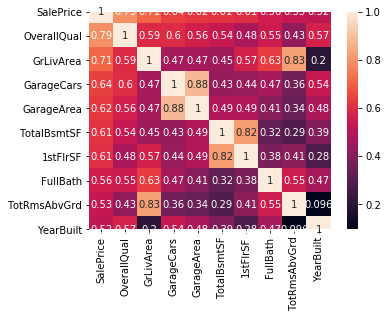

In [20]:
sns.heatmap(corr1,square=True,annot=True)
plt.show()

In [21]:
indx[1:]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [22]:
feature="OverallQual"

In [23]:
df=pd.concat([data_train["SalePrice"],data_train[feature]],axis=1)

In [24]:
df.head()

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


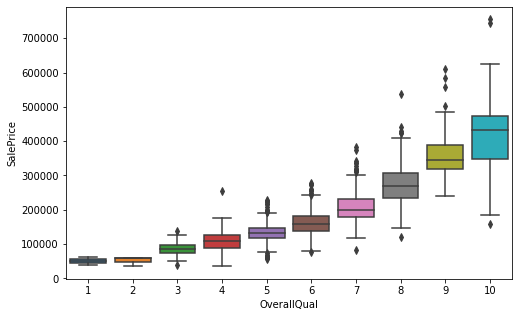

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="OverallQual",y="SalePrice") 
plt.show()

In [26]:
data_train["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

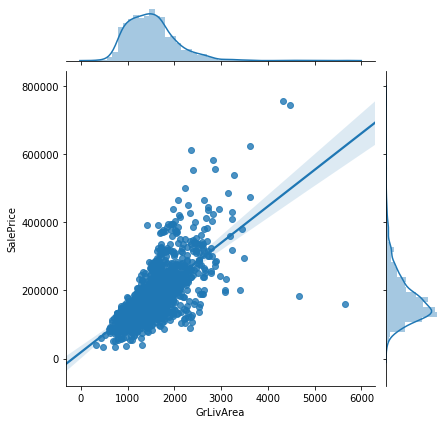

In [27]:
sns.jointplot(x=data_train["GrLivArea"],y=data_train["SalePrice"],kind="reg")
plt.show()

In [28]:
ind=data_train[(data_train["SalePrice"]<200000) & (data_train["GrLivArea"]>4300)].index

In [29]:
ind

Int64Index([523, 1298], dtype='int64')

In [30]:
data_train=data_train.drop(ind)

In [31]:
data_train=data_train.reset_index(drop=True)

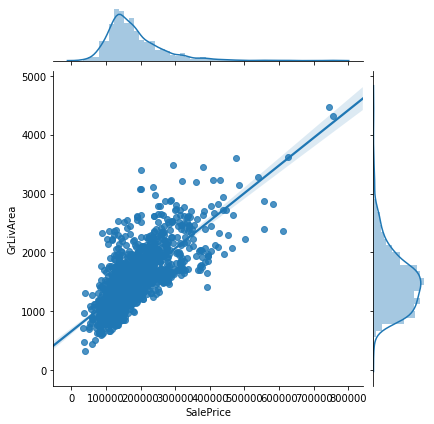

In [32]:
sns.jointplot(x=data_train["SalePrice"],y=data_train["GrLivArea"],kind="reg")

In [33]:
indx[1:]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [34]:
data_train["GarageArea"].describe()

count    1458.000000
mean      472.050069
std       212.239248
min         0.000000
25%       331.500000
50%       479.500000
75%       576.000000
max      1390.000000
Name: GarageArea, dtype: float64

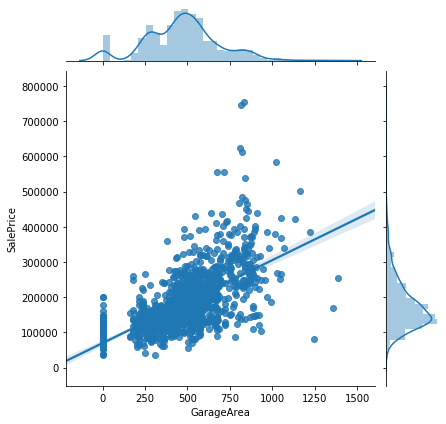

In [35]:
sns.jointplot(x=data_train["GarageArea"],y=data_train["SalePrice"],kind="reg")

In [36]:
inx=data_train[(data_train["GarageArea"]>=1200)&(data_train["SalePrice"]<300000)].index

In [37]:
inx

Int64Index([580, 1060, 1189], dtype='int64')

In [38]:
data_train=data_train.drop(inx)

In [39]:
data_train=data_train.reset_index(drop=True)

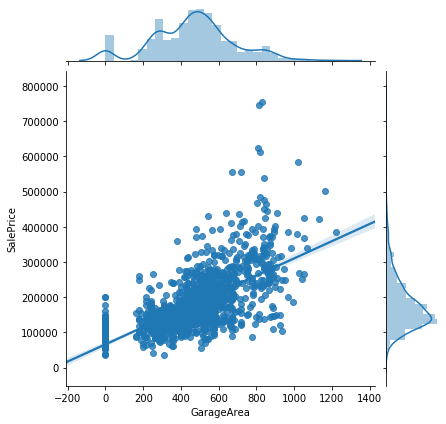

In [40]:
sns.jointplot(x=data_train["GarageArea"],y=data_train["SalePrice"],kind="reg")

In [41]:
data_train["GarageCars"].describe()

count    1455.000000
mean        1.762887
std         0.744164
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

In [42]:
data_train["GarageCars"].unique()

array([2, 3, 1, 0, 4], dtype=int64)

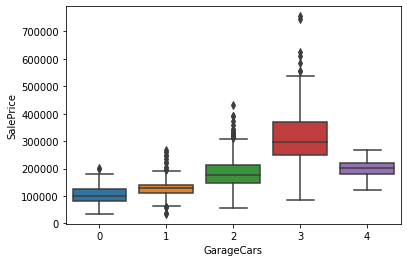

In [43]:
sns.boxplot(x=data_train["GarageCars"],y=data_train["SalePrice"])
plt.show()

In [44]:
inx=data_train[(data_train["GarageCars"]>3) & (data_train["SalePrice"]<300000)].index

In [45]:
inx

Int64Index([420, 745, 1335, 1345], dtype='int64')

In [46]:
data_train=data_train.drop(inx)

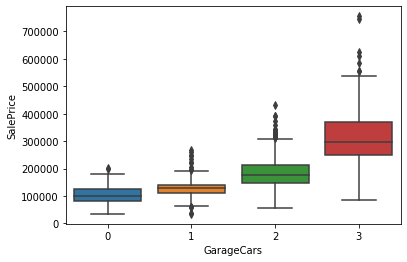

In [47]:
sns.boxplot(x=data_train["GarageCars"],y=data_train["SalePrice"])

In [48]:
data_train.isnull().head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


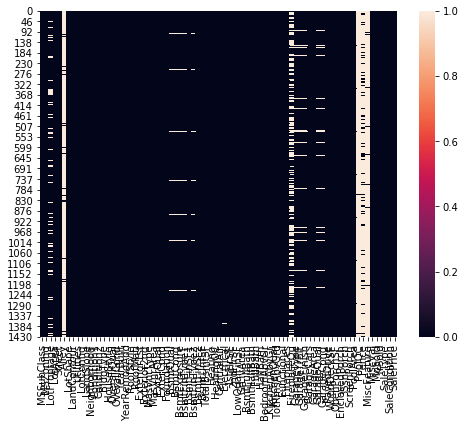

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(data_train.isnull(),xticklabels=data_train.columns)
plt.show()

In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1454
Data columns (total 80 columns):
MSSubClass       1451 non-null int64
MSZoning         1451 non-null object
LotFrontage      1193 non-null float64
LotArea          1451 non-null int64
Street           1451 non-null object
Alley            90 non-null object
LotShape         1451 non-null object
LandContour      1451 non-null object
Utilities        1451 non-null object
LotConfig        1451 non-null object
LandSlope        1451 non-null object
Neighborhood     1451 non-null object
Condition1       1451 non-null object
Condition2       1451 non-null object
BldgType         1451 non-null object
HouseStyle       1451 non-null object
OverallQual      1451 non-null int64
OverallCond      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofStyle        1451 non-null object
RoofMatl         1451 non-null object
Exterior1st      1451 non-null object
Exterior2nd      1451 non-

In [59]:
data_train["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

No alley access

In [60]:
data_train["Alley"]=data_train["Alley"].replace(0,np.NaN)

In [61]:
data_train["Alley"].fillna("No alley access",inplace=True)

In [62]:
#data_train["LotFrontage"].unique()

In [63]:
data_train["LotFrontage"].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [64]:
data_train["LotFrontage"].fillna(data_train["LotFrontage"].mean(),inplace=True)

In [65]:
data_train["MasVnrType"].unique()
#data_train["LotFrontage"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [66]:
data_train["MasVnrType"].fillna('Stone',inplace=True)

In [67]:
data_train["PoolQC"].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [68]:
data_train["PoolQC"].fillna("no pool",inplace=True)

In [69]:
data_train["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [70]:
data_train["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [71]:
data_train["GarageYrBlt"].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [72]:
data_train["GarageYrBlt"].fillna(data_train["GarageYrBlt"].mean(),inplace=True)

In [73]:
data_train["GarageType"].fillna("no garage",inplace=True)

In [74]:
data_train["FireplaceQu"].fillna("no fireplace",inplace=True)

In [51]:
data_train.shape

(1451, 80)

In [52]:
X=data_train.iloc[:,:79]

In [53]:
X=X.values

In [54]:
X.shape

(1451, 79)

In [55]:
y=data_train.iloc[:,79:]

In [56]:
y=y.values

In [57]:
y.shape

(1451, 1)

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [59]:
melbourne_model = DecisionTreeRegressor(random_state=1)

In [63]:
le=LabelEncoder()

In [67]:
le.fit_transform(numerical)

array([21, 19, 18, 27, 26, 34, 35, 22,  4,  5,  8, 32,  0,  1, 20, 15,  6,
        7, 11, 16,  3, 17, 31, 10, 14, 13, 12, 33, 25,  9,  2, 30, 28, 23,
       24, 36, 29])

In [68]:
melbourne_model.fit(X,y)

ValueError: could not convert string to float: 'RL'